In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data
pd.options.mode.chained_assignment = None  # default='warn'


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [2]:
df=pd.read_csv("../input/air-quality-data-in-india/city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Basic Exploration

In [3]:
df.shape

(29531, 16)

In [4]:
jk=df.loc[df["City"].isin(["Delhi"])]
jk.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

### Replacing Nan values with mean of the column.

In [13]:
kk=int(jk['AQI'].mean())
jk['AQI'].fillna(value=kk, inplace=True)


In [6]:
kl=int(jk['PM10'].mean())
jk['PM10'].fillna(value=kl, inplace=True)

In [7]:
jk["PM2.5"].fillna(0,inplace=True)

In [8]:
jk.isnull().sum() # As we are taking AQI, CO, PM10, PM2.5 

City            0
Date            0
PM2.5           0
PM10            0
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI             0
AQI_Bucket     10
dtype: int64

In [9]:
jk.reset_index(drop=True)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
2005,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
2006,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
2007,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


### Summarizing data by months.

In [30]:
io=jk["Date"]
io=pd.to_datetime(jk["Date"])
jk["Date"]=io

In [31]:

ty=jk.groupby(pd.Grouper(key='Date', axis=0, 
                      freq='M')).mean()
ty

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,
2015-01-31,175.690645,276.971290,26.392581,36.925484,51.794194,98.160323,10.269355,5.594194,25.868710,5.265161,10.913548,3.730323,342.290323
2015-02-28,153.920357,234.939643,29.287857,41.656786,54.208571,65.785714,11.137857,7.863214,30.829643,3.969286,9.411429,6.012857,327.928571
2015-03-31,80.338065,135.044516,15.010000,24.386129,30.734194,27.790323,9.863871,7.387097,28.738387,3.066452,8.617097,5.790968,256.064516
2015-04-30,91.562333,187.991333,18.510667,44.279667,54.751000,32.401667,7.218333,16.101333,58.172000,3.143333,9.826667,2.949667,305.266667
2015-05-31,97.109355,271.050645,30.833871,61.483548,78.628065,38.922903,8.008387,16.129032,69.061613,3.072581,10.062581,2.210000,348.580645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,57.506452,122.189032,21.949677,33.779355,38.555484,31.798710,0.881290,14.000000,37.859355,2.346129,20.715806,1.379677,135.838710
2020-04-30,44.940000,104.877667,9.710000,21.008333,20.548000,27.784000,0.780333,15.493667,46.185667,1.635000,10.364000,0.223333,113.000000
2020-05-31,55.448710,137.662258,9.770323,24.903871,22.486774,29.725484,0.908387,15.425161,56.768065,1.740000,13.970968,0.799677,148.645161


### AQI

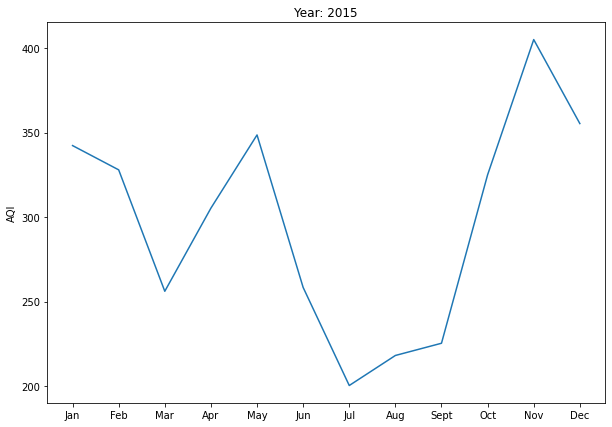

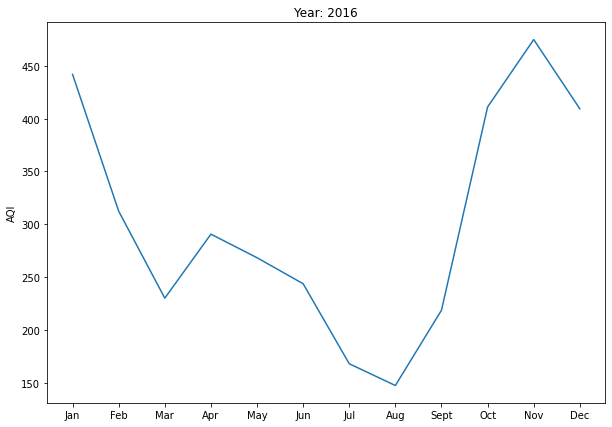

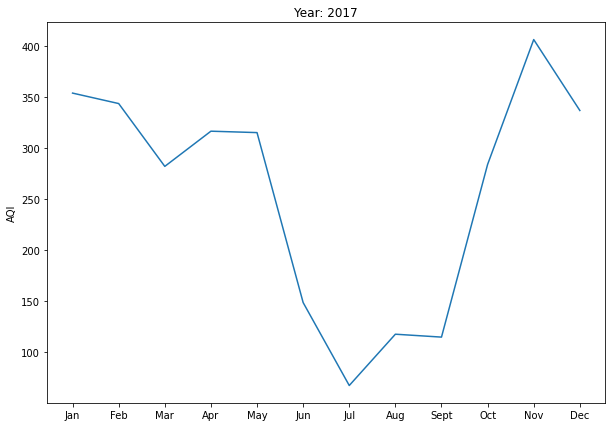

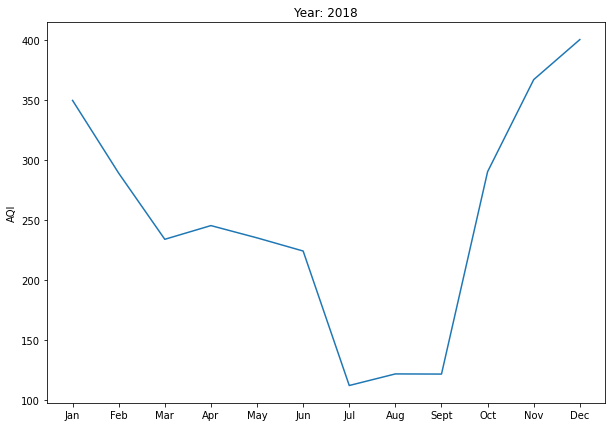

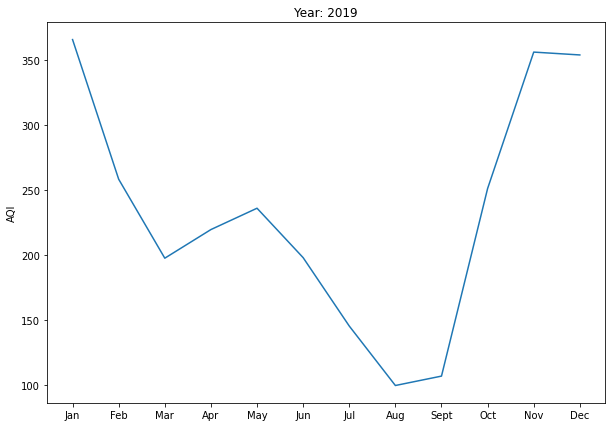

In [35]:

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
j=0
k=2015
for i in range(12,67,12):
 io=ty.iloc[j:i,:]
 j=j+12
 plt.figure(figsize=(10,7))
 ax=sns.lineplot(x=months,y="AQI",data=io)
 ax.set_title("Year: {}".format(k)) 
 k=k+1
 



### It can be seen that AQI is worse in the winter, rather than in summer and monsoon.

### PM10

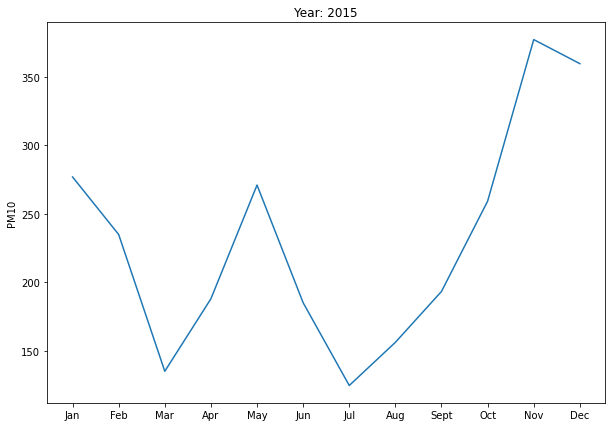

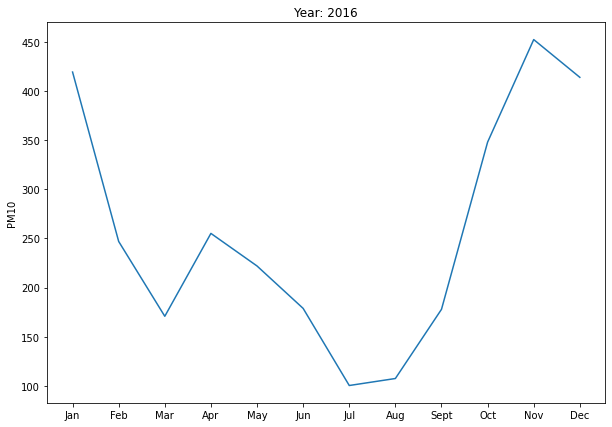

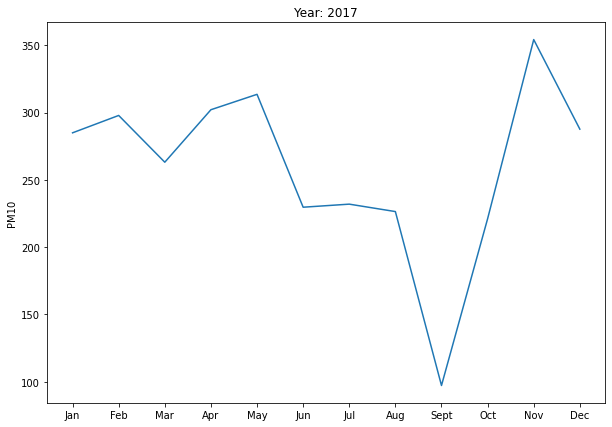

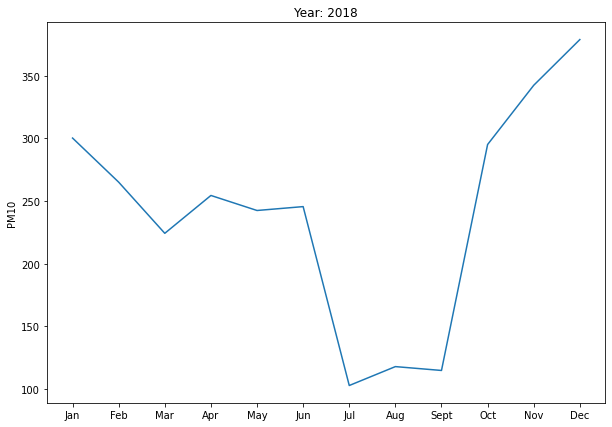

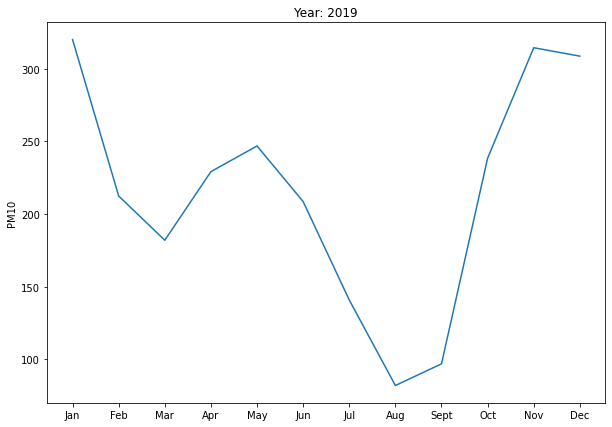

In [36]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
j=0
k=2015
for i in range(12,67,12):
 io=ty.iloc[j:i,:]
 j=j+12
 plt.figure(figsize=(10,7))
 ax=sns.lineplot(x=months,y="PM10",data=io)
 ax.set_title("Year: {}".format(k)) 
 k=k+1
 

### PM2.5

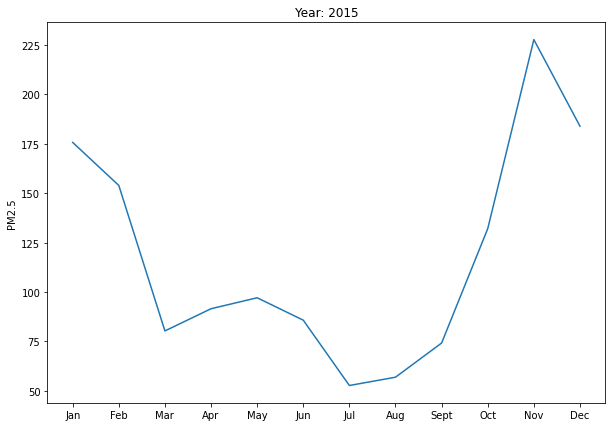

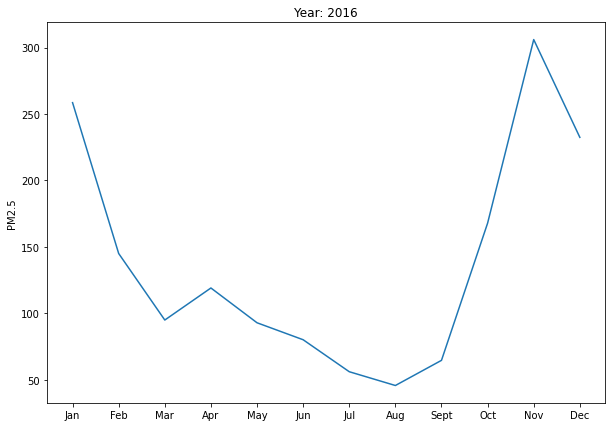

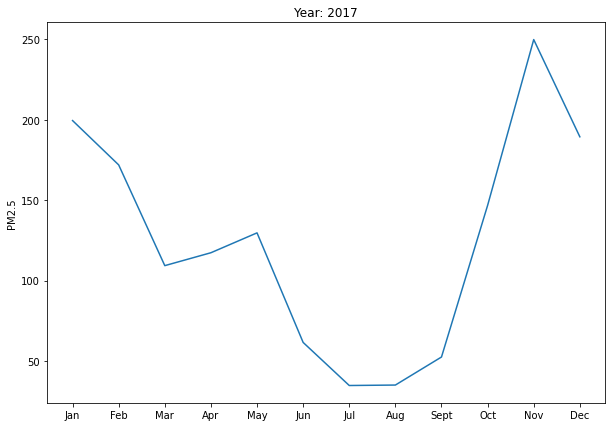

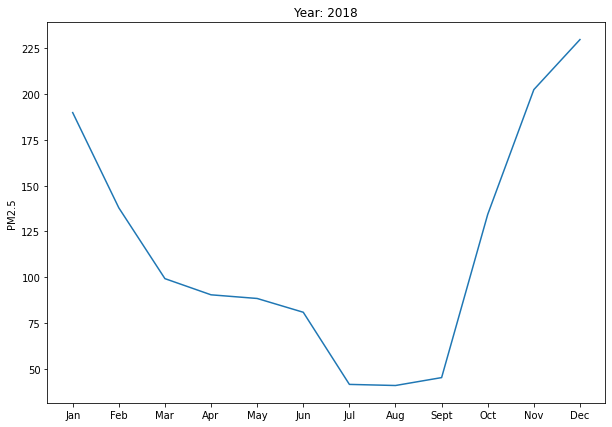

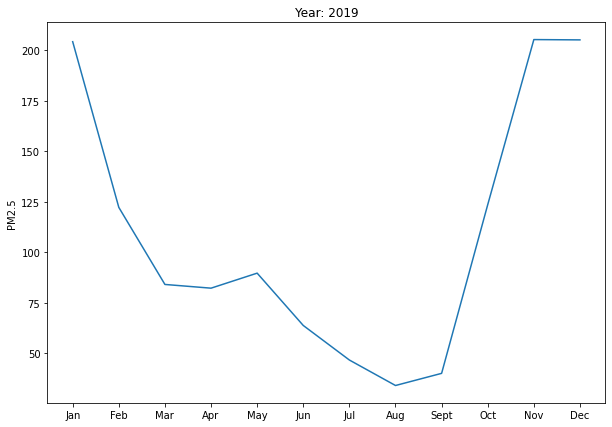

In [37]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
j=0
k=2015
for i in range(12,67,12):
 io=ty.iloc[j:i,:]
 j=j+12
 plt.figure(figsize=(10,7))
 ax=sns.lineplot(x=months,y="PM2.5",data=io)
 ax.set_title("Year: {}".format(k)) 
 k=k+1

### CO

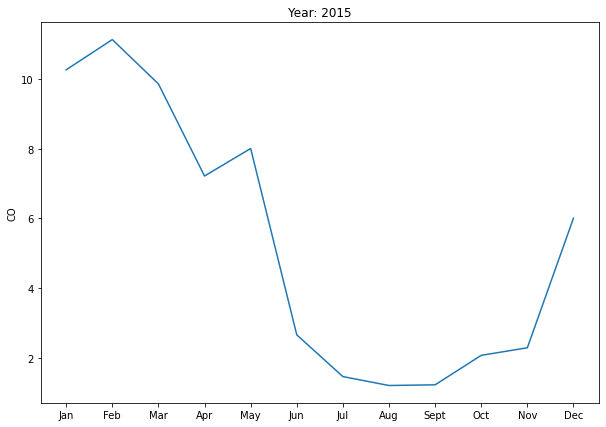

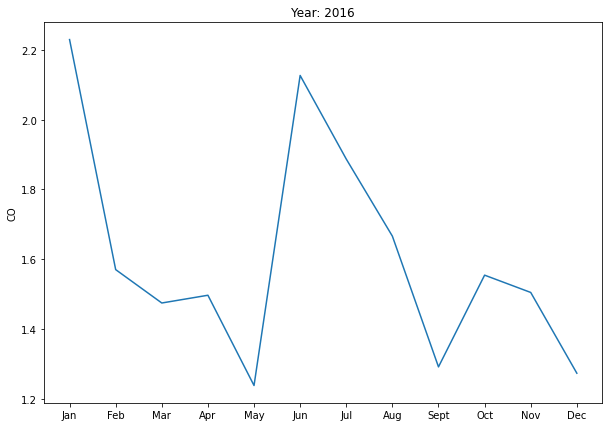

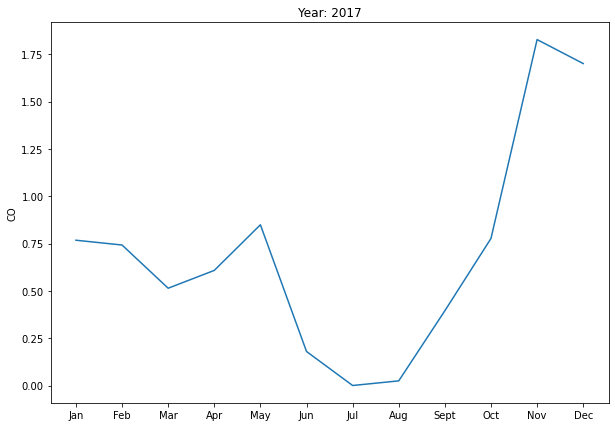

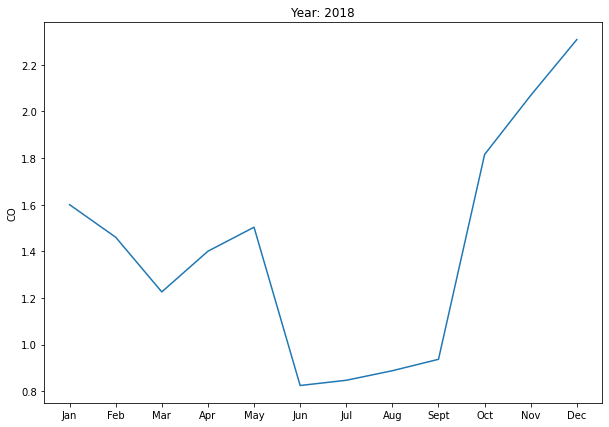

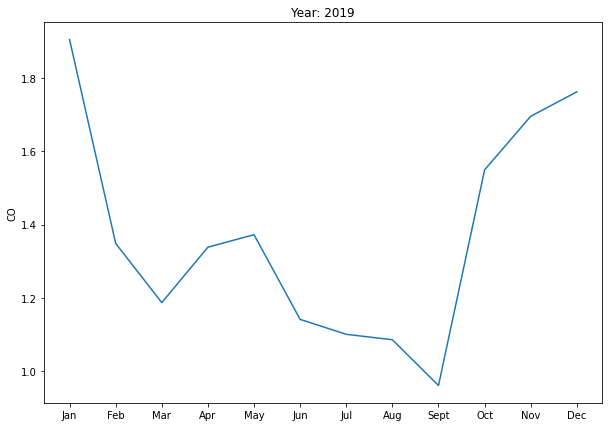

In [38]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
j=0
k=2015
for i in range(12,67,12):
 io=ty.iloc[j:i,:]
 j=j+12
 plt.figure(figsize=(10,7))
 ax=sns.lineplot(x=months,y="CO",data=io)
 ax.set_title("Year: {}".format(k)) 
 k=k+1

## Conclusions
#### 1. AQI, PM10, PM2.5 and CO all have similar kind of trends.
#### 2. Air quality is worst especially in the winter season, indicating the potential cause as stubble buring in nearby areas.
